In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

# Problem Statement
To predict whether the client will subscribe a term deposit or not

### Reading the csv file

In [2]:
bank = pd.read_csv(r"E:\Data Science\Assignments\Logistic Regression\bank-full.csv", sep= ';')
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
#Checking the shape of the dataset
bank.shape

(45211, 17)

In [4]:
#CHECKING THE BASIC STATISTICS OF THE DATASET
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### COUNT PLOT-TO Check which attributes have good impact to predict whether the cilent will subscribe to a term deposit or not

<Axes: xlabel='y', ylabel='count'>

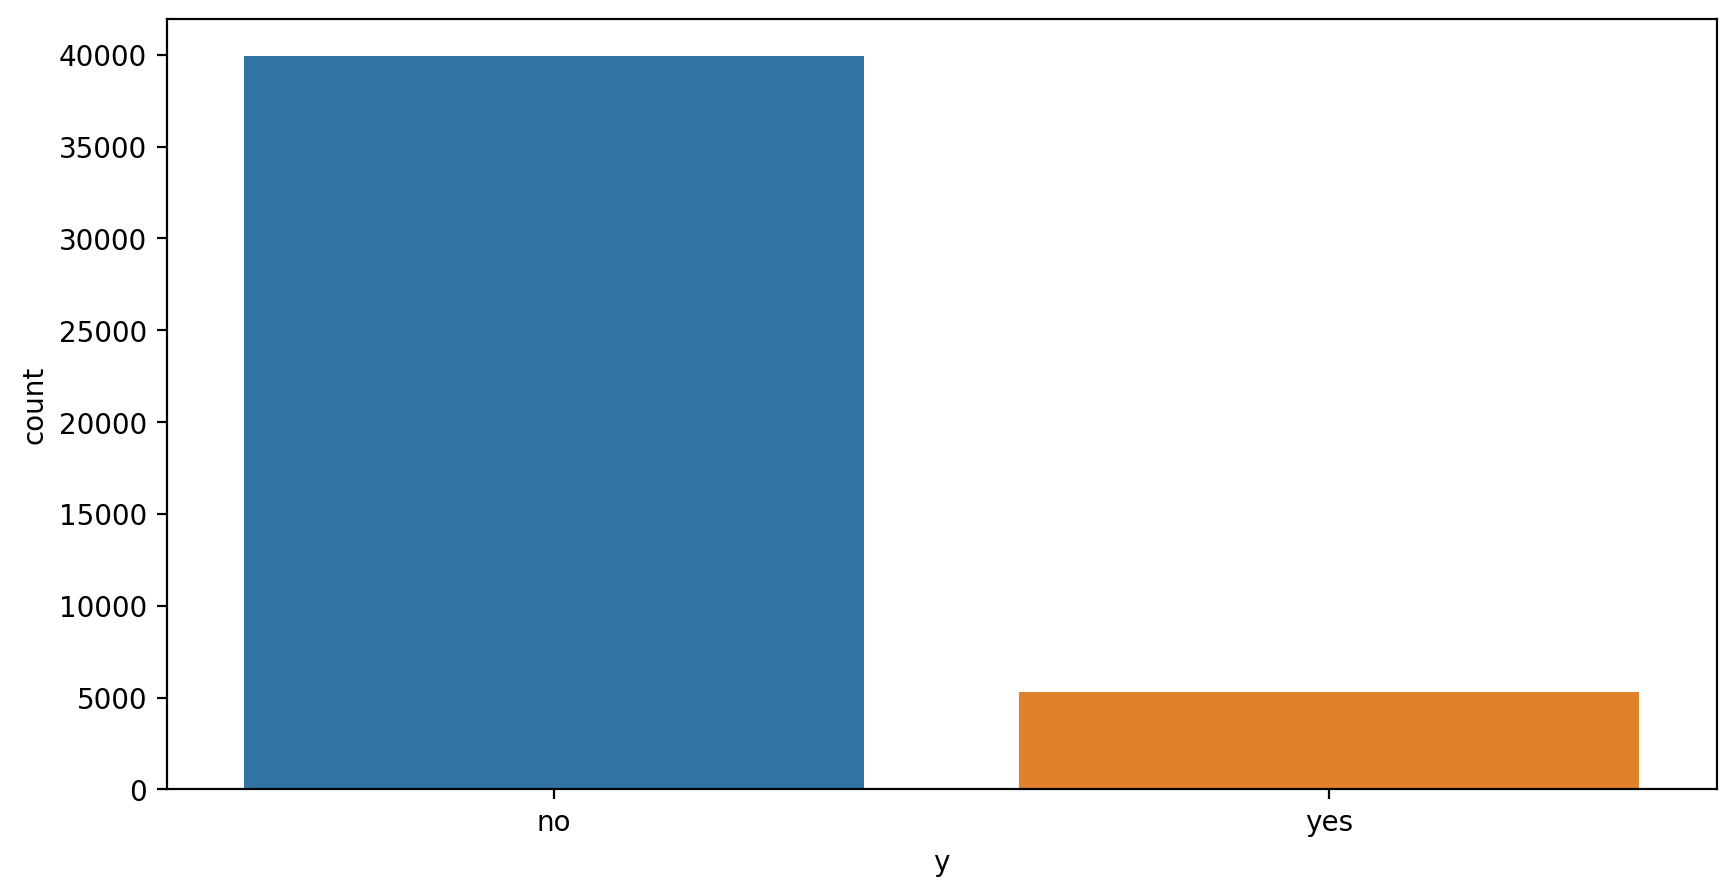

In [6]:
sns.countplot(x='y',data=bank)

Text(0, 0.5, 'Frequency of Purchase')

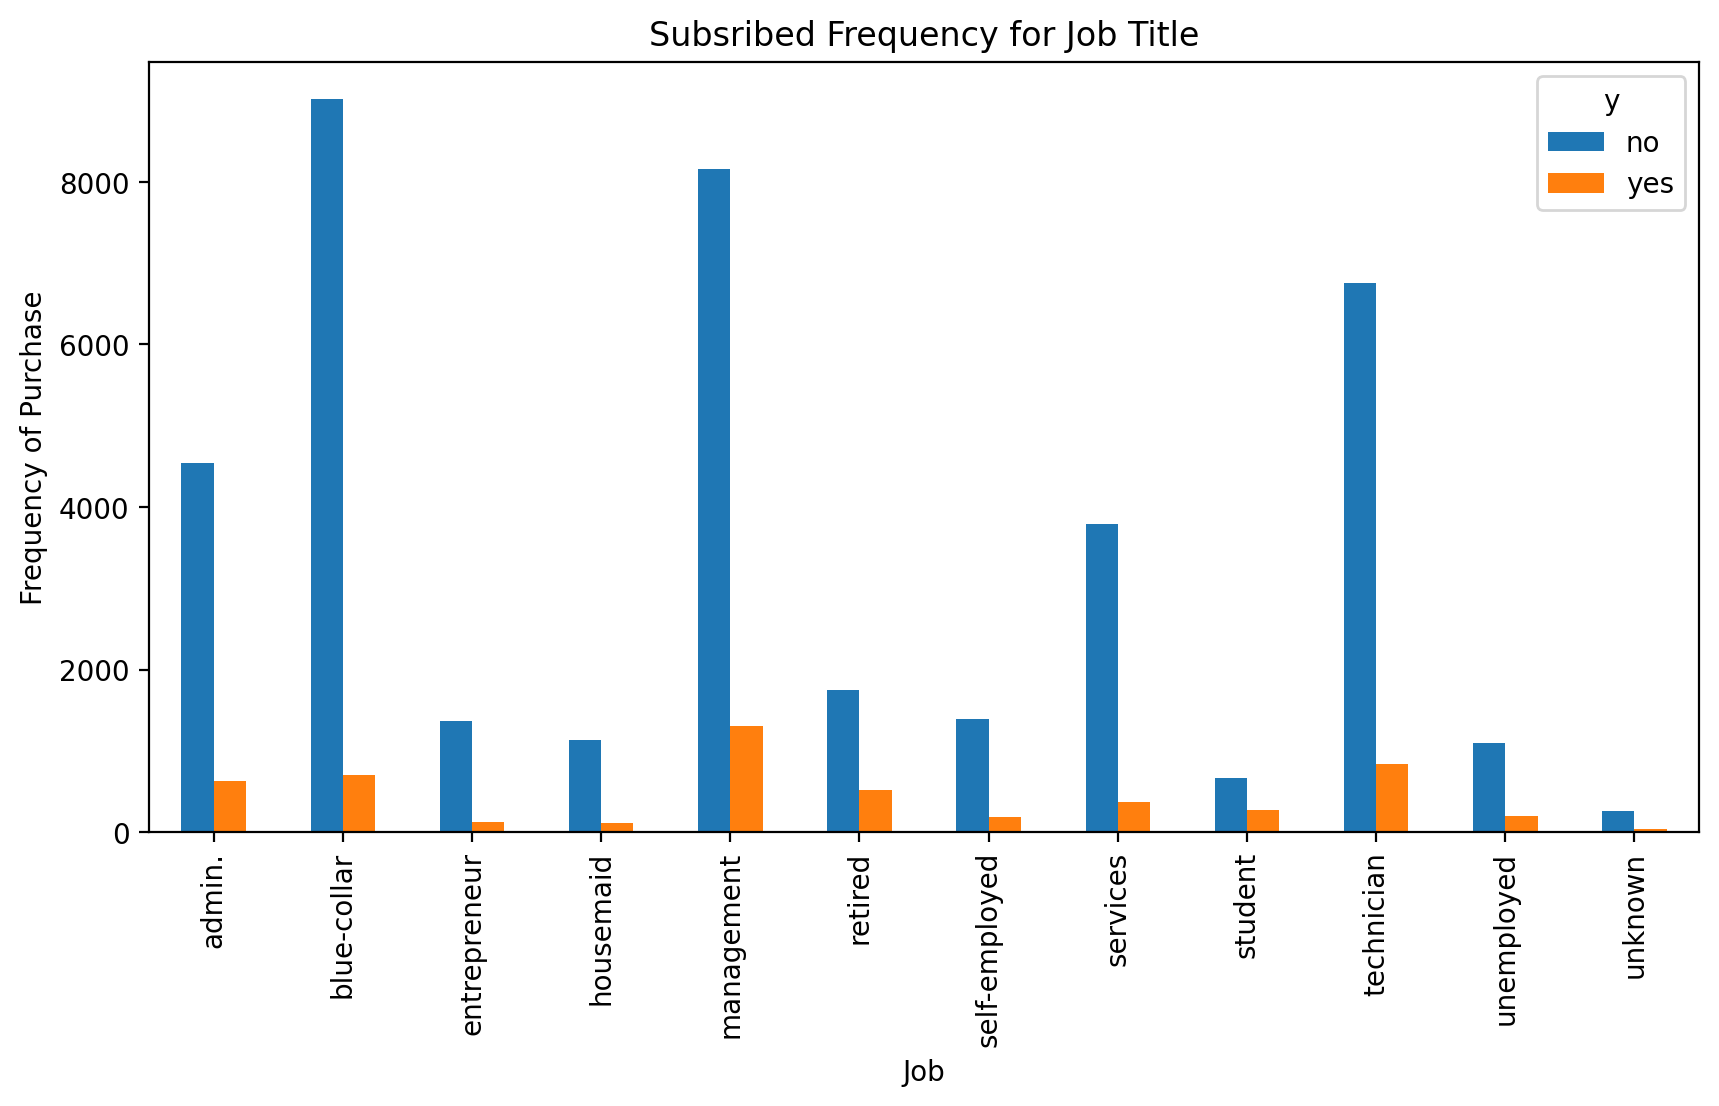

In [7]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Subsribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')


### All occupations have  different type of subscription to term deposit and so this is an important feature

Text(0, 0.5, 'Proportion of Customers')

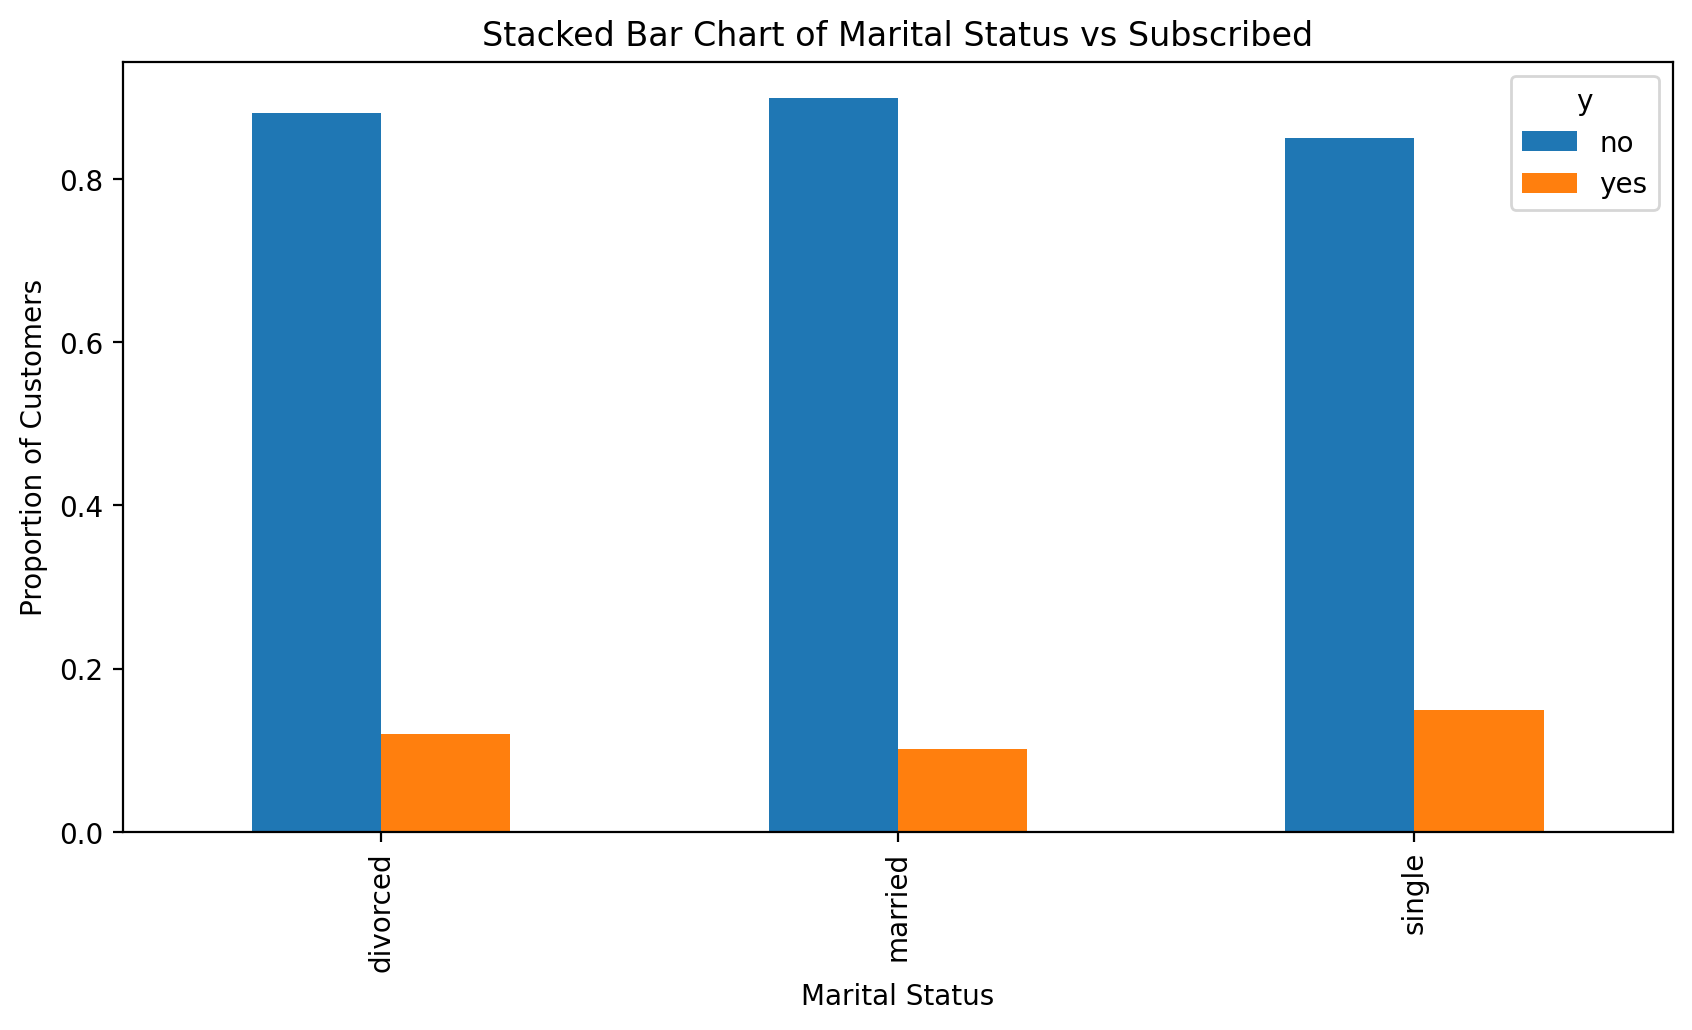

In [8]:
table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


### People from all status levels, have the same frequency. So, this is not an important feature 

Text(0, 0.5, 'Proportion of Customers')

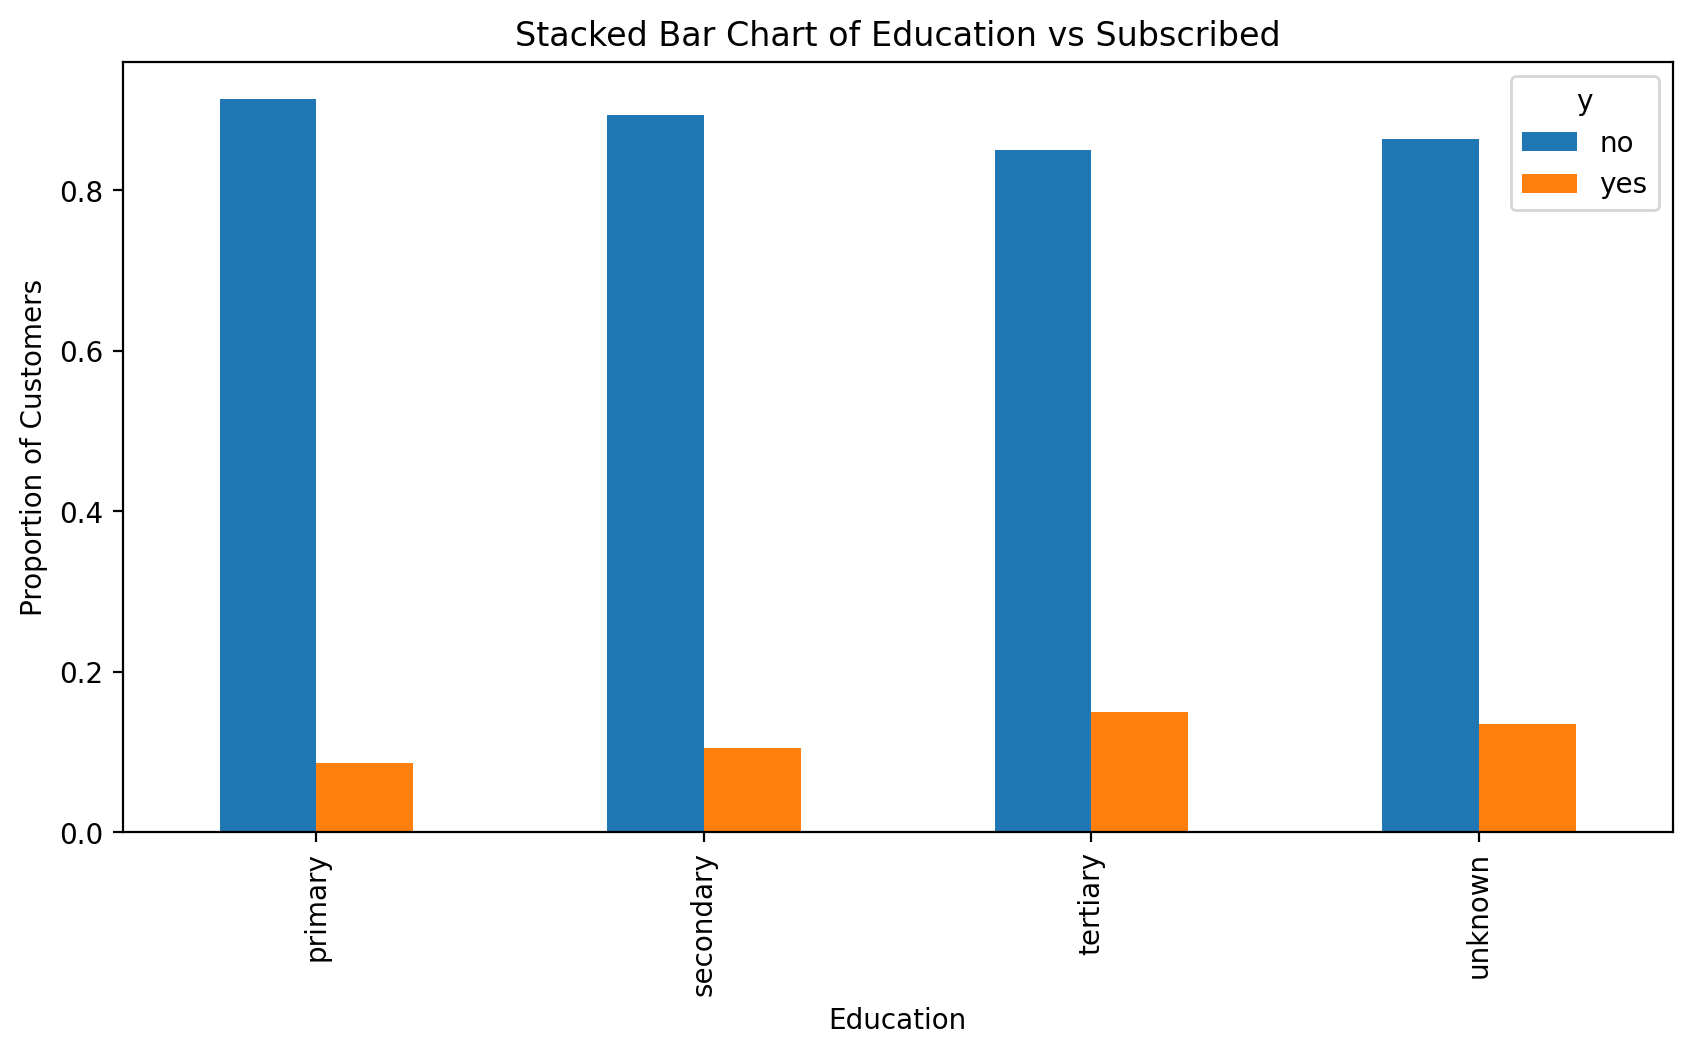

In [9]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')


### People with tertiary education, tend to get subscription to term deposit, a little more than people from other education background

Text(0, 0.5, 'Frequency of Subsribe')

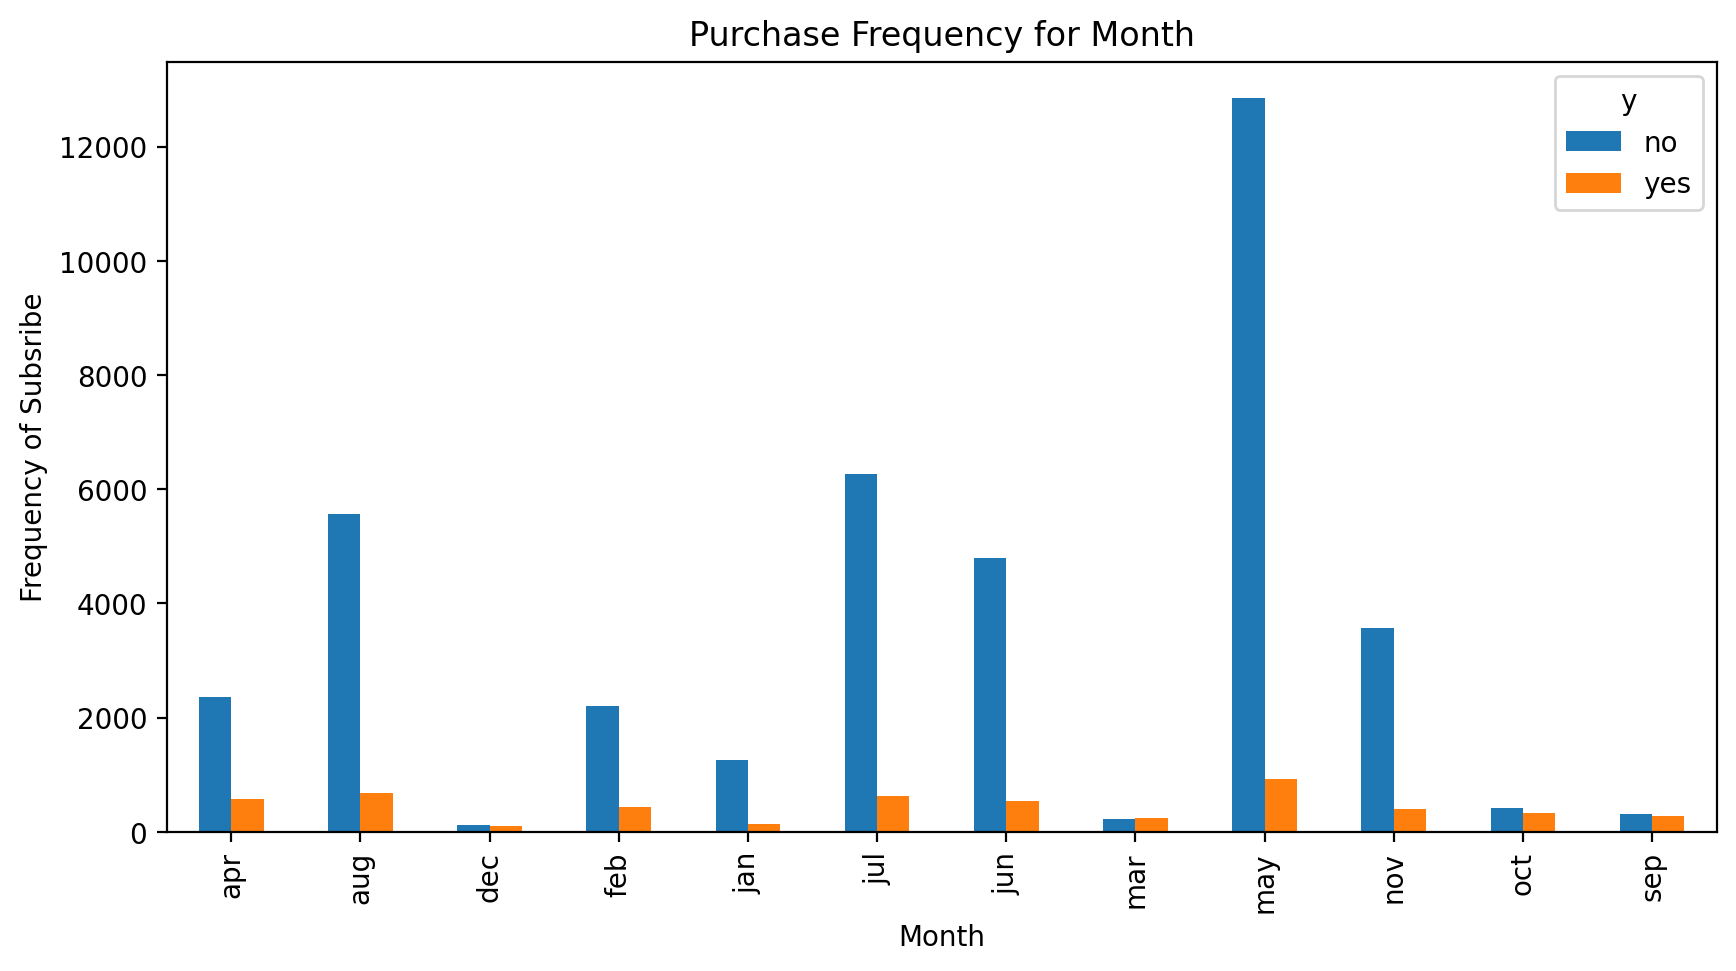

In [10]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')


### People tend to get term deposit mostly in the month of May

Boxplot: TO FINDING THE OUTLIERS

<Axes: title={'center': 'age'}, xlabel='y'>

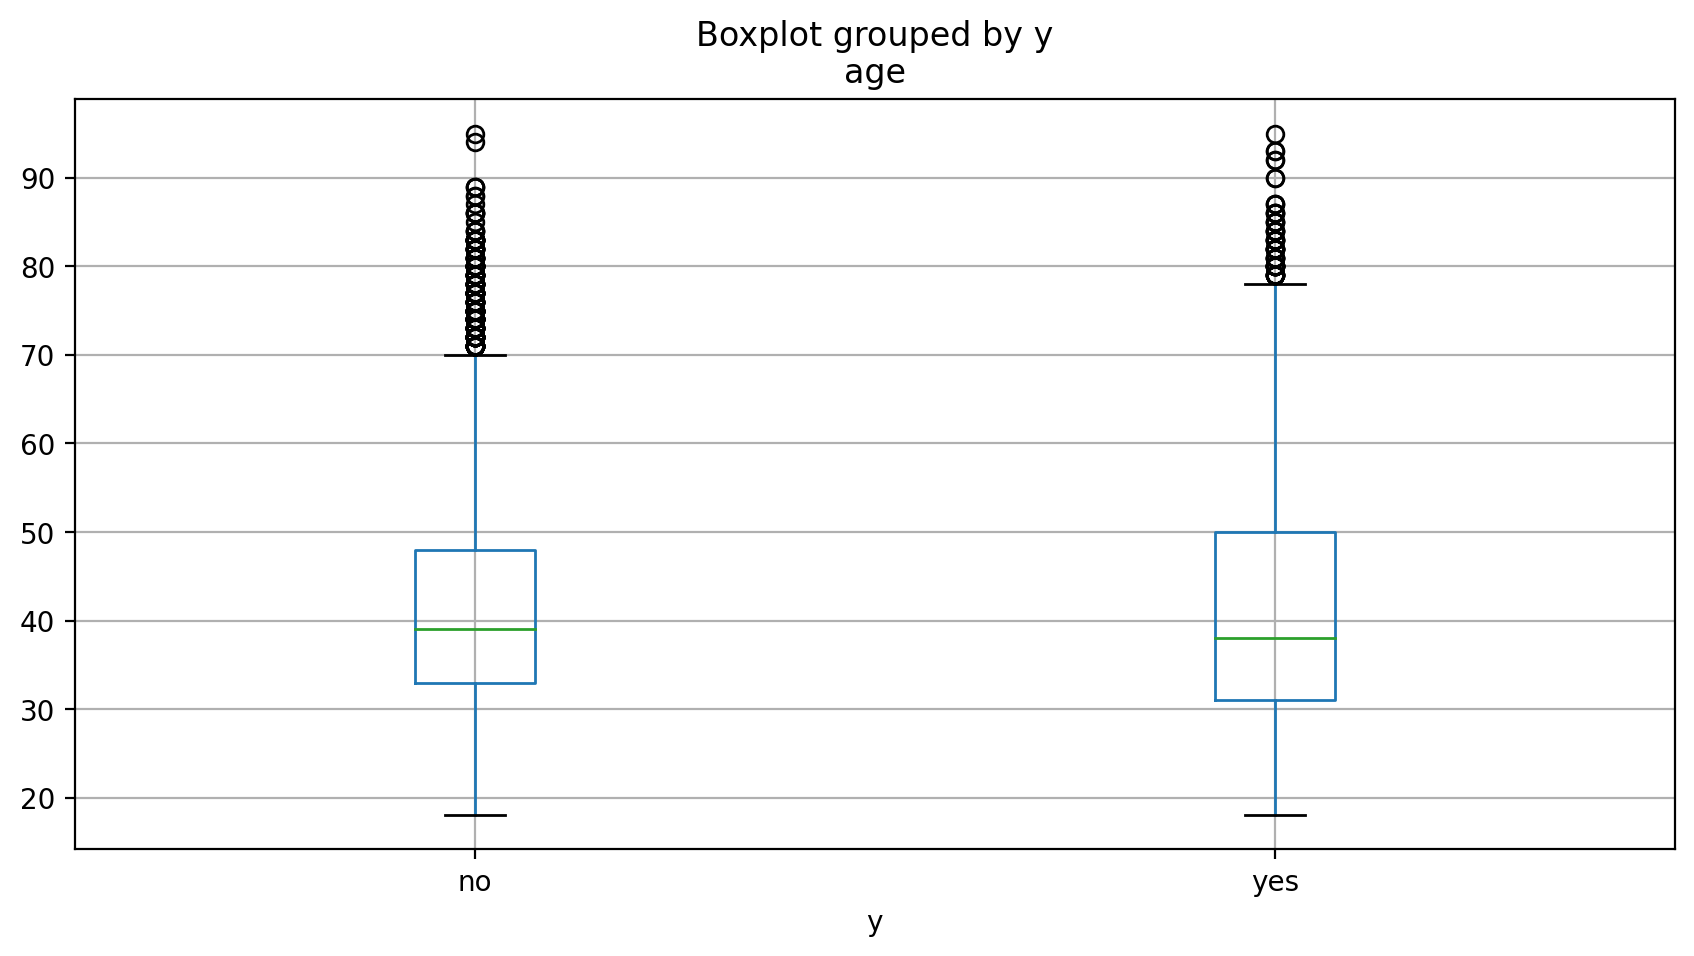

In [11]:
bank.boxplot(column='age', by='y')

Text(0, 0.5, 'Frequency of Subscribe')

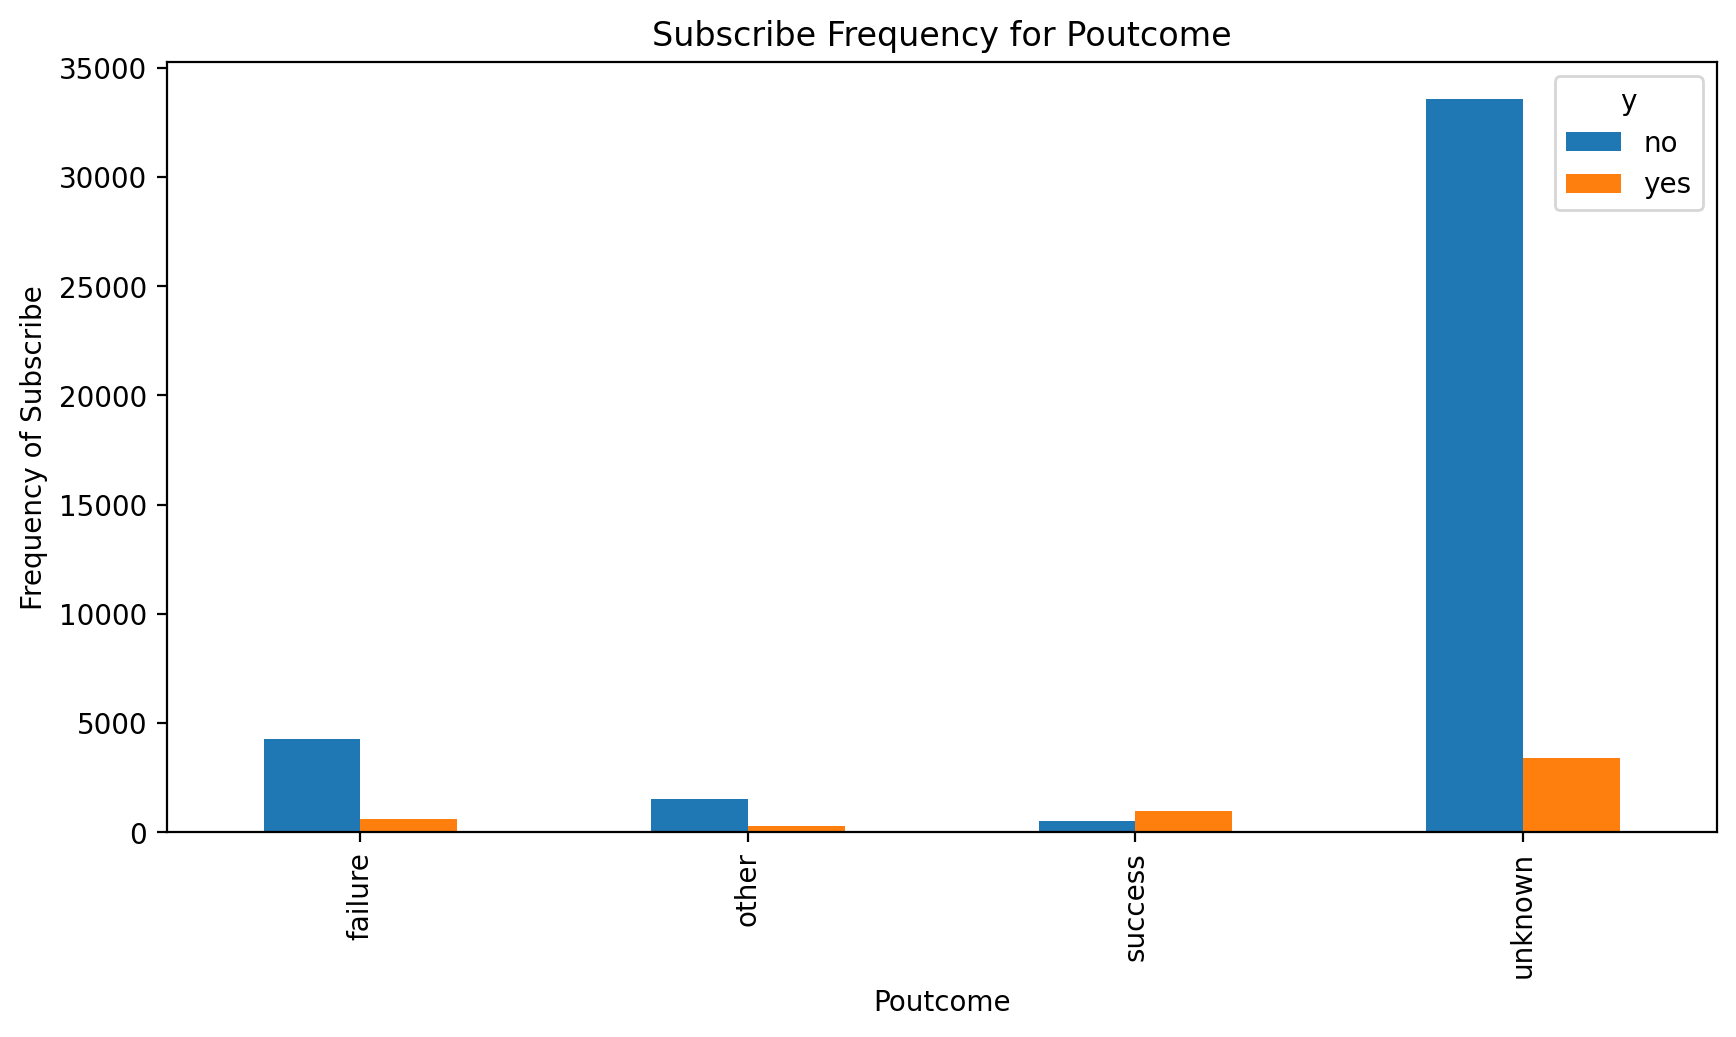

In [12]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subscribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribe')

In [13]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


C

In [14]:
### drop the features which are not contributing anything for the target
bank.drop(["month","education","pdays","day","campaign","age",'loan',"housing",'marital'],axis=1,inplace=True)

In [15]:
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


###### Creating dummy variables for categorical datas and dropping the columns that we created dummy variables

In [16]:
contactd=pd.get_dummies(bank['contact'],drop_first=True)

In [17]:
jobd=pd.get_dummies(bank['job'],drop_first=True)

In [18]:
poutcomed=pd.get_dummies(bank['poutcome'],drop_first=True)

In [19]:
defaultd = pd.get_dummies(bank['default'],drop_first=True)

In [20]:
bank = pd.concat([bank,defaultd,poutcomed,jobd,contactd],axis=1)
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1


In [21]:
bank.drop(['default','poutcome','job',"contact"],axis=1,inplace = True)
bank.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [22]:
bank_new= bank.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


### splitting the dependent variable and independent variable from the data

In [23]:
X = bank.drop("y",axis=1)
Y = bank["y"]

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

### Model prediction

In [25]:
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob

array([[0.97641673, 0.02358327],
       [0.98507776, 0.01492224],
       [0.99002749, 0.00997251],
       ...,
       [0.00853516, 0.99146484],
       [0.8822755 , 0.1177245 ],
       [0.87909578, 0.12090422]])

### confusion matrix - find the accuracy of the prediction:

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print (cm,accuracy)

[[39005   917]
 [ 3605  1684]] 0.8999800933401163


In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



### ROC AND AUC Curve

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  
y_predict= label_encoder.fit_transform(y_pred) 

y_actual= label_encoder.fit_transform(bank_new['y']) 

Text(0, 0.5, 'True Positive Rate')

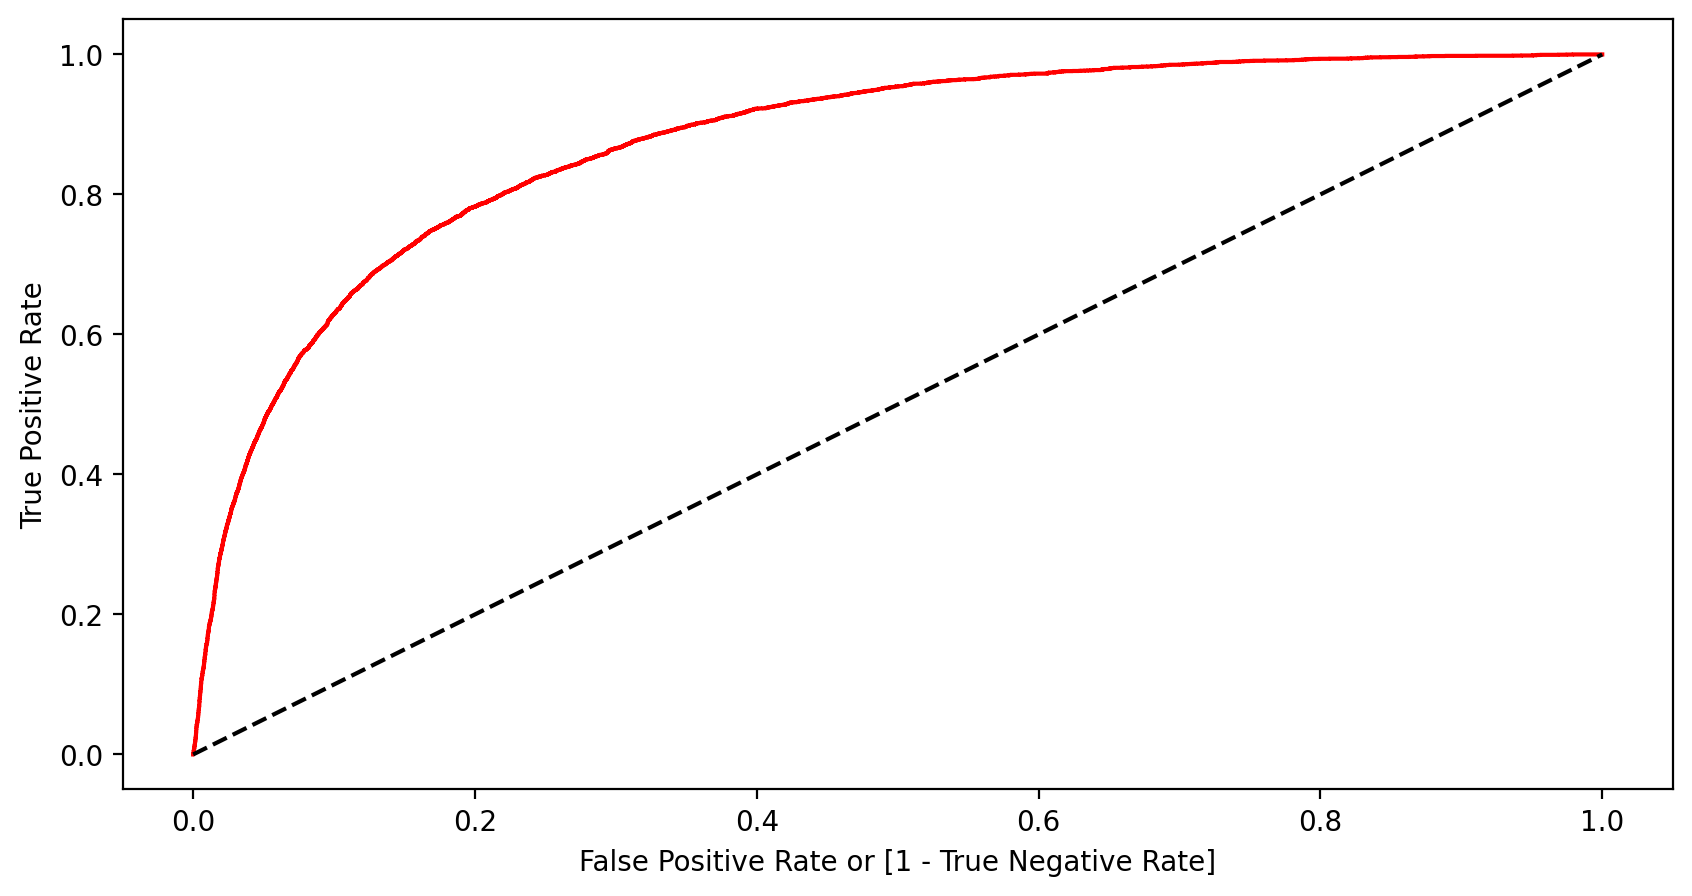

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [30]:
auc

0.6477134406230929

### Inference:
EDA is performed and a model is constructed only by considering the required and features that significantly contribute to the client subscribing to the term deposit.From the ROC curve, it is evident that, the area under curve is 64.8%, which means that by an approximation of 65%, 
it can be used to predict the true positive rate. It is biased beacuse, the dataset has been a large frequency of negative results.The precision, senstivity (true positive rate), Specificity (true negative rate ) and F1-score are also biased  because the dataset has a large frequency of negative result 
precision - no (0.92) and yes (0.65)    
recall -no (0.98) and yes (0.32)             
f1-score -no (0.95) and yes (0.43)   
support -no ( 39922) and yes (5289)                
Based upon the  observation the model gives 90% accurate prediction for the client to subscribe the term deposit 

